f1: Final point after gradient descent from (0.1, 0.1): (0.010737418240000003, 0.010737418240000003)


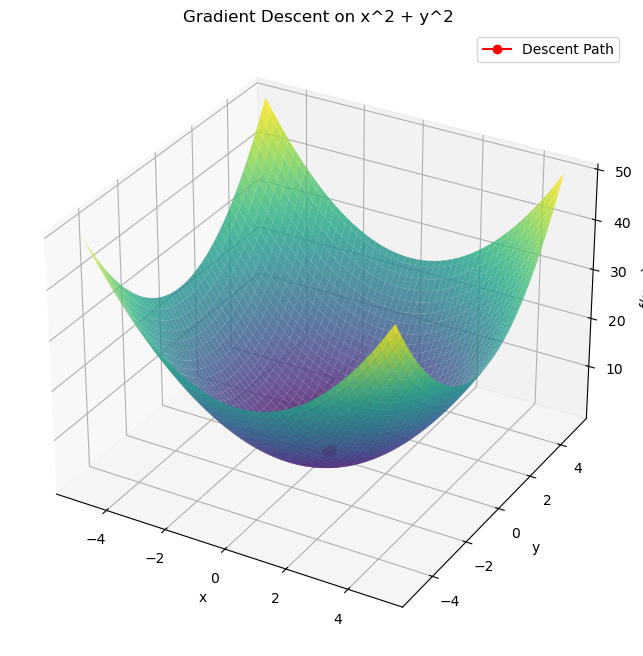

f1: Final point after gradient descent from (-1, 1): (-0.13261955589475316, 0.13261955589475316)


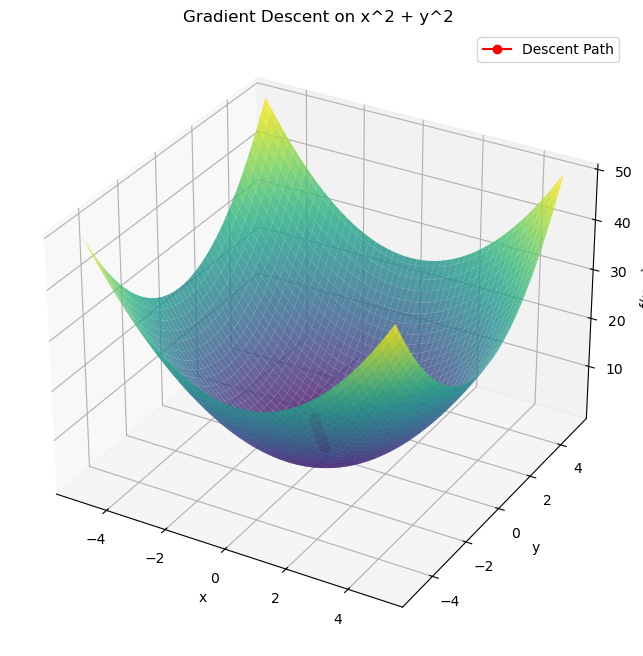

f2: Final point after gradient descent from (0, 1): (0.0, -2.0000004501391175)


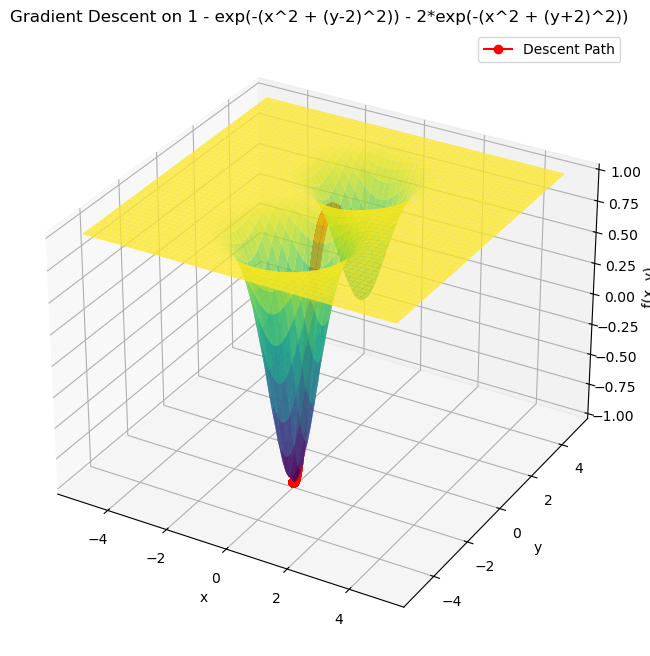

f2: Final point after gradient descent from (0, -1): (0.0, -2.0000004501391175)


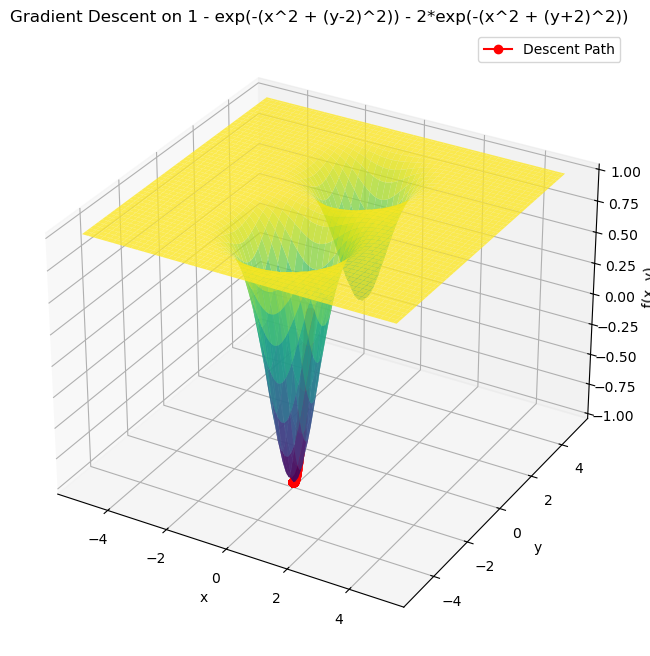

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting


def gradient_descent(x0, y0, f, grad_f, alpha, num_iterations):
    """
    Parameters:
    x0, y0: Initial point for the descent.
    f: a function of two variables
    grad_f: the gradient of f (a function that returns the gradient)
    alpha: Learning rate.
    num_iterations: Number of iterations to perform.

    Returns:
    (x, y, history): The coordinates of the final point and the history of the descent.
    """
    x, y = x0, y0  # Initialize x and y with the initial point
    history_x = [x]  # Store x values for plotting
    history_y = [y]  # Store y values for plotting

    for i in range(num_iterations):
        # obtain the gradient of f at (x, y)
        grad_x, grad_y = grad_f(x, y)  # Call the gradient function

        # Update x and y by taking a step in the
        # opposite direction of the gradient
        x = x - alpha * grad_x
        y = y - alpha * grad_y

        history_x.append(x)
        history_y.append(y)  # Append to history


    return x, y, (history_x, history_y)


# (b) Create a function f1(x, y) = x^2 + y^2 and its gradient:
def fun_1(x, y):
    return x**2 + y**2


def grad_f_1(x, y):
    grad_x = 2*x
    grad_y = 2*y
    return grad_x, grad_y


# (c) Create a function f2(x, y) = 1-exp(-(x^2+(y-2)^2))-2*exp(-(x^2+(y+2)^2)) and its gradient:

def fun_2(x, y):
    return 1 - np.exp(-(x**2 + (y-2)**2)) - 2*np.exp(-(x**2 + (y+2)**2))


def grad_f_2(x, y):
    grad_x = 2*x*np.exp(-(x**2 + (y - 2)**2)) + 4*x*np.exp(-(x**2 + (y + 2)**2))
    grad_y = (2*y + 4)*np.exp(-(x**2 + (y + 2)**2)) + (4 - 2*y)*np.exp(-(x**2 + (y - 2)**2))
    return grad_x, grad_y


def plot_descent_3d(f, history, x_range=(-5, 5), y_range=(-5, 5), function_name = "f(x,y)"):
    """
    Plots the function f and the path of gradient descent in 3D.
    """
    x = np.linspace(x_range[0], x_range[1], 100)
    y = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)  # Calculate function values over the grid

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)  # Plot the surface

    # Plot the gradient descent path
    hx, hy = history  # Unpack history
    hz = f(np.array(hx), np.array(hy))  # Evaluate function along the path

    ax.plot(hx, hy, hz, color='red', marker='o', linestyle='-', label='Descent Path') #Plot path

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_title(f'Gradient Descent on {function_name}')
    ax.legend()
    plt.show()

# Test cases:

# --- f1(x, y) = x^2 + y^2 ---
x0, y0 = (0.1, 0.1)
alpha = 0.1
num_iterations = 10
x_final, y_final, history = gradient_descent(x0, y0, fun_1, grad_f_1, alpha, num_iterations)
print(f"f1: Final point after gradient descent from ({x0}, {y0}): ({x_final}, {y_final})")

plot_descent_3d(fun_1, history, function_name="x^2 + y^2")


x0, y0 = (-1, 1)
alpha = 0.01
num_iterations = 100
x_final, y_final, history = gradient_descent(x0, y0, fun_1, grad_f_1, alpha, num_iterations)
print(f"f1: Final point after gradient descent from ({x0}, {y0}): ({x_final}, {y_final})")

plot_descent_3d(fun_1, history, function_name="x^2 + y^2")

# --- f2(x, y) = 1 - exp(-(x^2 + (y-2)^2)) - 2*exp(-(x^2 + (y+2)^2)) ---
x0, y0 = (0, 1)
alpha = 0.01
num_iterations = 10000
x_final, y_final, history = gradient_descent(x0, y0, fun_2, grad_f_2, alpha, num_iterations)
print(f"f2: Final point after gradient descent from ({x0}, {y0}): ({x_final}, {y_final})")

plot_descent_3d(fun_2, history, y_range=(-5,5), function_name="1 - exp(-(x^2 + (y-2)^2)) - 2*exp(-(x^2 + (y+2)^2))")


x0, y0 = (0, -1)
alpha = 0.01
num_iterations = 10000
x_final, y_final, history = gradient_descent(x0, y0, fun_2, grad_f_2, alpha, num_iterations)
print(f"f2: Final point after gradient descent from ({x0}, {y0}): ({x_final}, {y_final})")

plot_descent_3d(fun_2, history, y_range=(-5,5), function_name="1 - exp(-(x^2 + (y-2)^2)) - 2*exp(-(x^2 + (y+2)^2))")